In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current dpip install ultralyticsirectory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **IMPORT PACKAGES**

In [1]:
!pip install ultralytics
!pip install roboflow
from ultralytics import YOLO 
from IPython.display import Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5310.7/8062.4 GB disk)


# **LOAD THE TRAINING DATASET**

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="tAFRYqzjQXahvMhjPcZv")
project = rf.workspace("sixray-dpgc6").project("weapon_detection-cuahn")
dataset = project.version(4).download("yolov8")

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.231, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to weapon_detection-4 in yolov8:: 100%|██████████| 6008/6008 [00:00<00:00, 6164.96it/s]


# **LOAD THE MODEL**

In [3]:
yolo8_model_detection =YOLO('yolov8s.pt')
#yolo8_model_detection.predict(source='https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/I-80_Eastshore_Fwy.jpg/1200px-I-80_Eastshore_Fwy.jpg',save_txt=True ,save=True,exist_ok=True)
#Image(filename='runs/detect/predict/1200px-I-80_Eastshore_Fwy.jpg', height=300,width=500) 

100%|██████████| 21.5M/21.5M [00:00<00:00, 166MB/s]


# **COPY DATASET IN A NEW DIRECTORY**

In [6]:
import os 
os.makedirs('datasets',exist_ok = True)
!cp -r /kaggle/working/weapon_detection-4 datasets/SixRayFull-2

# **TRAIN MODEL**

In [7]:
# Define dataset path, epochs, image-size, Bacth and output directory.
yolo8_model_detection.train(data= '/kaggle/working/datasets/SixRayFull-2/data.yaml', epochs=120, imgsz=640, batch=64,project='YOLO_weights',name='SIXray_Output',exist_ok=True, device=[0, 1])

Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
                                                       CUDA:1 (Tesla T4, 15110MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/datasets/SixRayFull-2/data.yaml, epochs=120, time=None, patience=50, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1], workers=8, project=YOLO_weights, name=SIXray_Output, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames

100%|██████████| 755k/755k [00:00<00:00, 14.7MB/s]
2024-01-01 11:03:03,914	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-01-01 11:03:04,920	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TensorBoard: Start with 'tensorboard --logdir YOLO_weights/SIXray_Output', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=6
Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 72.8MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/train/labels... 2304 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2304/2304 [00:01<00:00, 1182.72it/s]


train: New cache created: /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/valid/labels...:   0%|          | 0/466 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
val: Scanning /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/valid/labels... 466 images, 0 backgrounds, 0 corrupt: 100%|██████████| 466/466 [00:00<00:00, 1480.48it/s]


val: New cache created: /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/valid/labels.cache
Plotting labels to YOLO_weights/SIXray_Output/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
120 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/120         8G      1.457      3.318      1.483        168        640: 100%|██████████| 36/36 [00:29<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


                   all        466       1127      0.692      0.331      0.331      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/120      8.06G      1.069      1.341      1.223        155        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


                   all        466       1127      0.744      0.366      0.386      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/120      8.05G      1.096      1.159       1.26        152        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.07it/s]


                   all        466       1127      0.457      0.147     0.0862     0.0453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/120      8.06G      1.139      1.165      1.297        139        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]


                   all        466       1127      0.561      0.302      0.324      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/120       8.1G      1.097       1.06      1.272        138        640: 100%|██████████| 36/36 [00:27<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  2.00it/s]


                   all        466       1127      0.545      0.355      0.353      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/120      8.06G      1.049     0.9718      1.237        101        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


                   all        466       1127      0.641      0.478      0.519      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/120      8.06G      1.052     0.9721      1.252        116        640: 100%|██████████| 36/36 [00:25<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.67it/s]


                   all        466       1127      0.705      0.486      0.545       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/120       8.1G      1.042     0.9309      1.234        112        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.90it/s]


                   all        466       1127      0.527        0.5      0.546      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/120      8.05G      1.018     0.8981      1.221        153        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


                   all        466       1127       0.72      0.525       0.58      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/120      8.06G     0.9824     0.8472      1.194        157        640: 100%|██████████| 36/36 [00:27<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.88it/s]


                   all        466       1127      0.711      0.484      0.552      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/120      8.05G     0.9783      0.843        1.2        115        640: 100%|██████████| 36/36 [00:26<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.86it/s]


                   all        466       1127       0.59      0.511      0.585      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/120      8.06G     0.9544     0.7929      1.176        137        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]


                   all        466       1127        0.9      0.556      0.677      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/120      8.06G      0.984     0.8086      1.198        163        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.94it/s]


                   all        466       1127      0.764      0.541      0.608      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/120      8.06G      0.933     0.7635      1.159        175        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


                   all        466       1127        0.8      0.606      0.708      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/120       8.1G     0.9486     0.7839      1.186        167        640: 100%|██████████| 36/36 [00:25<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


                   all        466       1127      0.892      0.589      0.716      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/120      8.04G     0.9335     0.7465      1.168        163        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.92it/s]


                   all        466       1127      0.796      0.606      0.798      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/120      8.05G     0.9058     0.7165      1.142        144        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


                   all        466       1127      0.904      0.578      0.833      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/120      8.06G     0.8972     0.7099      1.139        162        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.85it/s]


                   all        466       1127      0.871      0.623      0.825      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/120      8.06G     0.9042      0.712      1.144        133        640: 100%|██████████| 36/36 [00:27<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]


                   all        466       1127       0.87      0.691      0.745      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/120      8.06G     0.8855     0.6964       1.14        178        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.78it/s]


                   all        466       1127      0.893      0.712      0.913      0.683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/120       8.1G     0.8906     0.6889      1.131        155        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.85it/s]


                   all        466       1127      0.851      0.604       0.86      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/120      8.11G     0.8791     0.6785      1.127        154        640: 100%|██████████| 36/36 [00:27<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.85it/s]


                   all        466       1127      0.825      0.587      0.815      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/120       8.1G     0.8683     0.6743      1.117        161        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]


                   all        466       1127      0.773      0.596      0.639      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/120       8.1G     0.8649     0.6508      1.121        124        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


                   all        466       1127      0.914      0.624      0.846      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/120       8.1G     0.8604     0.6471      1.126        149        640: 100%|██████████| 36/36 [00:26<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]


                   all        466       1127      0.884      0.632      0.848      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/120      8.06G     0.8614     0.6475      1.126        138        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.92it/s]


                   all        466       1127      0.679      0.893      0.884        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/120      8.05G     0.8378     0.6281      1.101        135        640: 100%|██████████| 36/36 [00:25<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


                   all        466       1127      0.835      0.867      0.886      0.723

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/120       8.1G     0.8358     0.6186      1.106        117        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.87it/s]


                   all        466       1127      0.833      0.664       0.85      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/120      8.05G     0.8293     0.6113      1.093        161        640: 100%|██████████| 36/36 [00:26<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]


                   all        466       1127      0.806      0.655      0.707      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/120      8.06G     0.8256     0.6149      1.099        127        640: 100%|██████████| 36/36 [00:27<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]


                   all        466       1127      0.901      0.614      0.775      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/120      8.06G     0.8205     0.6053      1.092        155        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.92it/s]


                   all        466       1127      0.621      0.844      0.847      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/120      8.05G     0.8249     0.6116      1.102        165        640: 100%|██████████| 36/36 [00:26<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]


                   all        466       1127      0.714      0.877      0.819      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/120      8.05G      0.822     0.6048      1.098        150        640: 100%|██████████| 36/36 [00:26<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.89it/s]


                   all        466       1127      0.866      0.706      0.916      0.721

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/120       8.1G     0.8012     0.5927       1.08        176        640: 100%|██████████| 36/36 [00:26<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.86it/s]


                   all        466       1127      0.638      0.935      0.891      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/120       8.1G     0.8264      0.606      1.101        137        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]


                   all        466       1127       0.86      0.687        0.8      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/120       8.1G     0.7973     0.5817      1.078        153        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.88it/s]


                   all        466       1127      0.879      0.803      0.877      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/120      8.01G     0.8065     0.5899      1.089        152        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.79it/s]


                   all        466       1127      0.751      0.851      0.815      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/120      8.05G      0.784     0.5633      1.074        151        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


                   all        466       1127      0.794      0.829      0.899      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/120       8.1G     0.7813      0.556      1.071        124        640: 100%|██████████| 36/36 [00:25<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]


                   all        466       1127      0.756      0.833       0.85      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/120       8.1G     0.8012     0.5731      1.083        139        640: 100%|██████████| 36/36 [00:25<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.54it/s]


                   all        466       1127      0.605      0.891      0.852      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/120      8.05G     0.7726     0.5538      1.066        136        640: 100%|██████████| 36/36 [00:26<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


                   all        466       1127      0.842      0.812      0.839      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/120      8.11G     0.7792     0.5538      1.073        147        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


                   all        466       1127      0.793      0.838      0.863      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/120       8.1G     0.7763     0.5616      1.069        138        640: 100%|██████████| 36/36 [00:26<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]


                   all        466       1127      0.846      0.865      0.872      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/120      8.06G     0.7711     0.5574      1.069        140        640: 100%|██████████| 36/36 [00:25<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]


                   all        466       1127      0.956      0.845      0.906      0.744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/120      8.05G     0.7723     0.5426      1.061        143        640: 100%|██████████| 36/36 [00:25<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


                   all        466       1127      0.847       0.82      0.881      0.732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/120      8.06G     0.7619      0.546      1.061        108        640: 100%|██████████| 36/36 [00:26<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


                   all        466       1127      0.926      0.796       0.89      0.737

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/120       8.1G     0.7624      0.546      1.057        131        640: 100%|██████████| 36/36 [00:26<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.62it/s]


                   all        466       1127      0.912      0.829      0.924      0.756

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/120       8.1G      0.754     0.5325      1.056        134        640: 100%|██████████| 36/36 [00:26<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]


                   all        466       1127      0.922       0.85      0.917      0.761

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/120       8.1G      0.736     0.5196      1.044        155        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.63it/s]


                   all        466       1127      0.916      0.865      0.899      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/120       8.1G     0.7451     0.5176      1.051        146        640: 100%|██████████| 36/36 [00:25<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]


                   all        466       1127      0.805      0.863      0.883      0.746

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/120      8.05G     0.7424     0.5298      1.056        155        640: 100%|██████████| 36/36 [00:25<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]


                   all        466       1127       0.89      0.852      0.888      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/120      8.06G     0.7492     0.5253      1.046        177        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]


                   all        466       1127      0.872      0.795      0.883       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/120      8.11G     0.7342     0.5123      1.048        178        640: 100%|██████████| 36/36 [00:25<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.78it/s]


                   all        466       1127      0.855      0.851      0.909      0.744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/120       8.1G     0.7296      0.511       1.04        169        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


                   all        466       1127      0.934      0.861      0.905      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/120      8.05G     0.7369     0.5121      1.046        172        640: 100%|██████████| 36/36 [00:26<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]


                   all        466       1127      0.757      0.918       0.91      0.747

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/120      8.05G     0.7286     0.5058      1.042        146        640: 100%|██████████| 36/36 [00:26<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]


                   all        466       1127      0.938      0.839      0.912       0.76

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/120       8.1G      0.727     0.5064      1.038        142        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.90it/s]


                   all        466       1127      0.913      0.801      0.894      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/120      8.05G     0.7243     0.5031      1.042        152        640: 100%|██████████| 36/36 [00:25<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]


                   all        466       1127       0.92      0.854      0.908      0.761

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/120       8.1G     0.7321     0.4969      1.041        164        640: 100%|██████████| 36/36 [00:25<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.78it/s]


                   all        466       1127      0.846       0.82      0.882      0.743

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/120       8.1G     0.7084     0.4866      1.027        158        640: 100%|██████████| 36/36 [00:25<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]


                   all        466       1127      0.917      0.861      0.944      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/120       8.1G      0.717     0.4904      1.029        169        640: 100%|██████████| 36/36 [00:25<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.87it/s]


                   all        466       1127      0.852      0.845      0.915      0.763

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/120      8.11G     0.7133     0.4966      1.043        125        640: 100%|██████████| 36/36 [00:24<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


                   all        466       1127      0.914      0.862      0.905      0.755

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/120       8.1G     0.7136     0.4913      1.036        139        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


                   all        466       1127       0.94       0.85      0.917      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/120      8.11G     0.7143     0.4723      1.032        154        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.85it/s]


                   all        466       1127      0.921      0.853      0.938      0.764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/120       8.1G     0.7043     0.4846      1.034        148        640: 100%|██████████| 36/36 [00:25<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.88it/s]


                   all        466       1127      0.902      0.849      0.919      0.769

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/120      8.06G     0.6844     0.4771      1.017        159        640: 100%|██████████| 36/36 [00:26<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


                   all        466       1127      0.868      0.851      0.921       0.76

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/120      8.06G     0.6972     0.4742       1.03        150        640: 100%|██████████| 36/36 [00:25<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


                   all        466       1127      0.925      0.851      0.928      0.782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/120       8.1G     0.6895     0.4654      1.014        131        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]


                   all        466       1127       0.93      0.856       0.96      0.803

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/120       8.1G     0.6856     0.4738      1.015        137        640: 100%|██████████| 36/36 [00:26<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.78it/s]


                   all        466       1127      0.944      0.851      0.931      0.783

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/120      8.06G     0.6861     0.4696      1.021        140        640: 100%|██████████| 36/36 [00:26<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]


                   all        466       1127      0.881      0.937      0.958      0.778

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/120      8.06G     0.6861     0.4707      1.022        129        640: 100%|██████████| 36/36 [00:27<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


                   all        466       1127      0.919      0.845      0.925       0.78

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/120       8.1G     0.6733     0.4544      1.009        135        640: 100%|██████████| 36/36 [00:26<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.85it/s]


                   all        466       1127      0.932       0.87      0.924      0.782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/120      8.06G     0.6835     0.4634      1.008        151        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.79it/s]


                   all        466       1127      0.942      0.872      0.932      0.777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/120      8.05G     0.6603     0.4422     0.9948        146        640: 100%|██████████| 36/36 [00:26<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]


                   all        466       1127      0.867      0.925      0.945      0.783

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/120       8.1G     0.6681      0.459      1.013        151        640: 100%|██████████| 36/36 [00:26<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]


                   all        466       1127      0.927      0.854       0.92       0.78

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/120      8.06G     0.6611     0.4367      1.004        163        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]


                   all        466       1127      0.942      0.865      0.923      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/120      8.06G       0.65     0.4424     0.9976        127        640: 100%|██████████| 36/36 [00:26<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]


                   all        466       1127      0.949      0.861      0.903      0.777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/120      8.05G     0.6506     0.4328     0.9959        146        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]


                   all        466       1127      0.957      0.861      0.926      0.772

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/120      8.04G     0.6541     0.4416      1.003        160        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]


                   all        466       1127      0.956      0.861      0.961      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/120      8.05G     0.6509     0.4471      1.006        146        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]


                   all        466       1127      0.924      0.887      0.942       0.78

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/120      8.06G     0.6572     0.4471      1.006        135        640: 100%|██████████| 36/36 [00:26<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.78it/s]


                   all        466       1127      0.948      0.875      0.905       0.77

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/120       8.1G     0.6531     0.4342      1.001        156        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]


                   all        466       1127      0.964       0.86      0.919      0.761

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/120      8.06G     0.6306     0.4199      0.988        163        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.87it/s]


                   all        466       1127      0.953      0.871      0.937       0.77

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/120       8.1G     0.6403       0.43     0.9951        164        640: 100%|██████████| 36/36 [00:26<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]


                   all        466       1127      0.922      0.863      0.928      0.774

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/120       8.1G     0.6316     0.4285     0.9952        198        640: 100%|██████████| 36/36 [00:27<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.94it/s]


                   all        466       1127      0.941      0.882      0.975      0.799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/120      8.06G     0.6403     0.4337      0.998        155        640: 100%|██████████| 36/36 [00:26<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


                   all        466       1127      0.962      0.873      0.913      0.769

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/120      8.06G     0.6139     0.4137     0.9892        138        640: 100%|██████████| 36/36 [00:26<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.89it/s]


                   all        466       1127      0.958      0.868      0.918      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/120       8.1G     0.6248     0.4193     0.9939        126        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.87it/s]


                   all        466       1127      0.928      0.909      0.947      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/120      8.06G     0.6234     0.4224      0.989        149        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]


                   all        466       1127       0.95      0.898      0.951      0.812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/120      8.05G     0.6222     0.4183     0.9944        127        640: 100%|██████████| 36/36 [00:25<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]


                   all        466       1127      0.969       0.86      0.916      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/120       8.1G      0.628     0.4196     0.9925        147        640: 100%|██████████| 36/36 [00:25<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]


                   all        466       1127       0.93      0.881      0.929      0.795

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/120      8.01G     0.6275     0.4241     0.9948        164        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]


                   all        466       1127      0.928      0.862      0.914      0.785

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/120      8.06G     0.6152     0.4187     0.9882        140        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]


                   all        466       1127       0.93      0.905      0.954      0.783

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/120      8.06G     0.6096     0.4115     0.9838        150        640: 100%|██████████| 36/36 [00:25<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]


                   all        466       1127      0.944      0.886      0.944      0.798

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/120      8.05G     0.6115     0.4061     0.9847        130        640: 100%|██████████| 36/36 [00:26<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.94it/s]


                   all        466       1127       0.95      0.861       0.95        0.8

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/120      8.11G     0.6089     0.4105     0.9826        135        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.79it/s]


                   all        466       1127      0.931       0.88      0.923       0.79

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/120      8.05G     0.6046        0.4     0.9872        145        640: 100%|██████████| 36/36 [00:25<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


                   all        466       1127       0.87      0.888      0.922      0.767

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/120      8.01G     0.6051     0.4067     0.9773        134        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]


                   all        466       1127      0.943      0.865      0.946      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/120       8.1G     0.5938     0.3975     0.9722        148        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]


                   all        466       1127      0.951      0.904      0.951      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/120      8.06G     0.5997     0.3992     0.9799        179        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.90it/s]


                   all        466       1127      0.946      0.919      0.948      0.806

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/120      8.06G     0.5931     0.4032     0.9793        125        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


                   all        466       1127      0.931      0.921      0.953      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/120      8.05G     0.5871     0.3925     0.9737        136        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


                   all        466       1127      0.953      0.863      0.939      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/120      8.05G     0.5703     0.3898     0.9643        142        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.88it/s]


                   all        466       1127      0.958      0.861      0.937      0.814

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/120      8.05G     0.5719     0.3894     0.9642         98        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.92it/s]


                   all        466       1127      0.953      0.865       0.94       0.81

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/120      8.06G     0.5727     0.3901     0.9661        133        640: 100%|██████████| 36/36 [00:25<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


                   all        466       1127      0.957      0.873      0.917      0.781

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/120      8.06G     0.5808     0.3878     0.9664        112        640: 100%|██████████| 36/36 [00:25<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]


                   all        466       1127      0.954      0.879       0.93      0.801

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/120       8.1G     0.5763     0.3819     0.9683        163        640: 100%|██████████| 36/36 [00:25<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.86it/s]


                   all        466       1127      0.947       0.87      0.945      0.805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/120      8.11G     0.5686     0.3812     0.9617        139        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.85it/s]


                   all        466       1127      0.956       0.87      0.932      0.806

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/120      8.05G     0.5633     0.3813     0.9655        146        640: 100%|██████████| 36/36 [00:26<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]


                   all        466       1127      0.962       0.87      0.935        0.8

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/120      8.06G     0.5664     0.3773     0.9597        132        640: 100%|██████████| 36/36 [00:27<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.10it/s]


                   all        466       1127      0.954       0.88      0.936       0.81
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/120      8.01G     0.4727     0.2724     0.9254         77        640: 100%|██████████| 36/36 [00:27<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]


                   all        466       1127      0.949      0.877      0.931      0.795

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/120      8.01G     0.4621     0.2717     0.9049         75        640: 100%|██████████| 36/36 [00:24<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.07it/s]


                   all        466       1127      0.954      0.878      0.938      0.794

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/120      8.01G     0.4589     0.2638     0.9082         86        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.79it/s]


                   all        466       1127      0.945      0.886      0.925      0.794

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/120      8.01G     0.4518     0.2675     0.8979         73        640: 100%|██████████| 36/36 [00:23<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


                   all        466       1127      0.947      0.881      0.917      0.792

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/120      8.01G     0.4453     0.2627      0.893         94        640: 100%|██████████| 36/36 [00:23<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]


                   all        466       1127      0.956      0.882      0.927      0.773

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/120      8.01G     0.4478     0.2625      0.896         68        640: 100%|██████████| 36/36 [00:24<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]


                   all        466       1127      0.948      0.884      0.931      0.778

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/120      8.01G     0.4512     0.2632     0.9007         88        640: 100%|██████████| 36/36 [00:24<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]


                   all        466       1127      0.945      0.886      0.927      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/120      8.01G     0.4373     0.2585     0.8929         68        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.89it/s]


                   all        466       1127      0.937      0.886      0.922      0.797

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/120      8.01G     0.4306     0.2552     0.8922         75        640: 100%|██████████| 36/36 [00:24<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.89it/s]


                   all        466       1127      0.941      0.886      0.919      0.795

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/120      8.01G      0.431     0.2544     0.8878         65        640: 100%|██████████| 36/36 [00:24<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]


                   all        466       1127      0.933       0.89      0.919      0.793

120 epochs completed in 1.056 hours.
Optimizer stripped from YOLO_weights/SIXray_Output/weights/last.pt, 22.5MB
Optimizer stripped from YOLO_weights/SIXray_Output/weights/best.pt, 22.5MB

Validating YOLO_weights/SIXray_Output/weights/best.pt...
Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
                                                       CUDA:1 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.14it/s]


                   all        466       1127      0.928      0.909      0.947      0.822
                   Gun        466        645      0.985      0.984      0.993      0.855
                Hammer        466          1      0.708          1      0.995      0.995
                 Knife        466        319      0.967      0.914       0.97      0.754
                Pliers        466         84      0.976      0.984      0.994      0.853
              Scissors        466          4          1      0.644      0.765      0.655
                Wrench        466         74      0.932      0.925      0.964      0.817
Speed: 1.1ms preprocess, 3.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to YOLO_weights/SIXray_Output


# **VAIDATE MODEL**

In [8]:
# Load a model
model = YOLO('/kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/valid/labels.cache... 466 images, 0 backgrounds, 0 corrupt: 100%|██████████| 466/466 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.78it/s]


                   all        466       1127      0.961      0.856      0.936      0.811
                   Gun        466        645      0.995      0.971      0.993      0.856
                Hammer        466          1      0.841          1      0.995      0.995
                 Knife        466        319          1      0.867      0.969      0.753
                Pliers        466         84       0.98      0.964      0.994      0.853
              Scissors        466          4      0.968        0.5      0.703      0.599
                Wrench        466         74      0.984      0.836      0.964      0.812
Speed: 0.5ms preprocess, 9.9ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val


array([    0.85591,       0.995,     0.75256,     0.85288,     0.59936,     0.81234])

# **MODEL TESTING**


image 1/228 /kaggle/working/weapon_detection-4/test/images/N0000166_jpg.rf.7c9383f5d79cb9782b6cfdc3d7a07cdd.jpg: 640x544 2 Knifes, 1 Wrench, 88.7ms
image 2/228 /kaggle/working/weapon_detection-4/test/images/N0000637_jpg.rf.e0231f9c6a1e34bdd9d8557b1fd94073.jpg: 640x544 (no detections), 15.8ms
image 3/228 /kaggle/working/weapon_detection-4/test/images/N0001322_jpg.rf.f31610478a5bac2138f59e3998167bb1.jpg: 416x640 1 Knife, 81.6ms
image 4/228 /kaggle/working/weapon_detection-4/test/images/N0001930_jpg.rf.ab588e56ff560500342d9a0107528528.jpg: 416x640 1 Scissors, 12.6ms
image 5/228 /kaggle/working/weapon_detection-4/test/images/N0002052_jpg.rf.53c9314bae8470c3190c7775cd2b1b4a.jpg: 416x640 1 Wrench, 12.6ms
image 6/228 /kaggle/working/weapon_detection-4/test/images/N0002224_jpg.rf.270fe5c038044d2f32f3c57c26f127ce.jpg: 416x640 1 Gun, 12.6ms
image 7/228 /kaggle/working/weapon_detection-4/test/images/N0002236_jpg.rf.67e72fa7490a83edb470ee92ff0cba2c.jpg: 416x640 1 Gun, 12.6ms
image 8/228 /kaggle/w

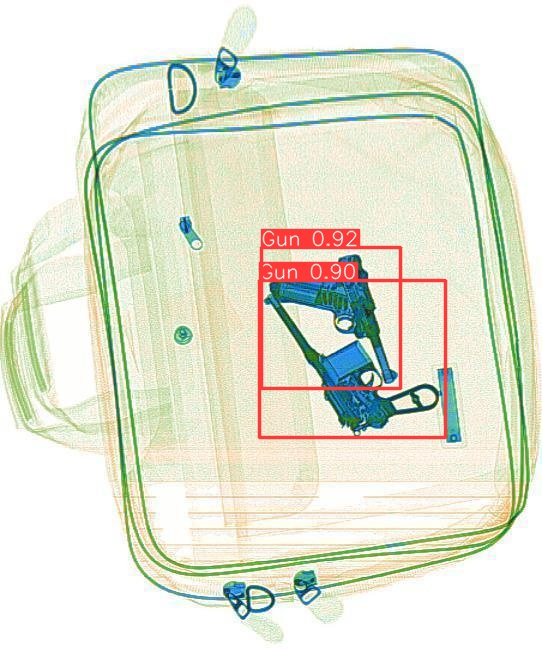

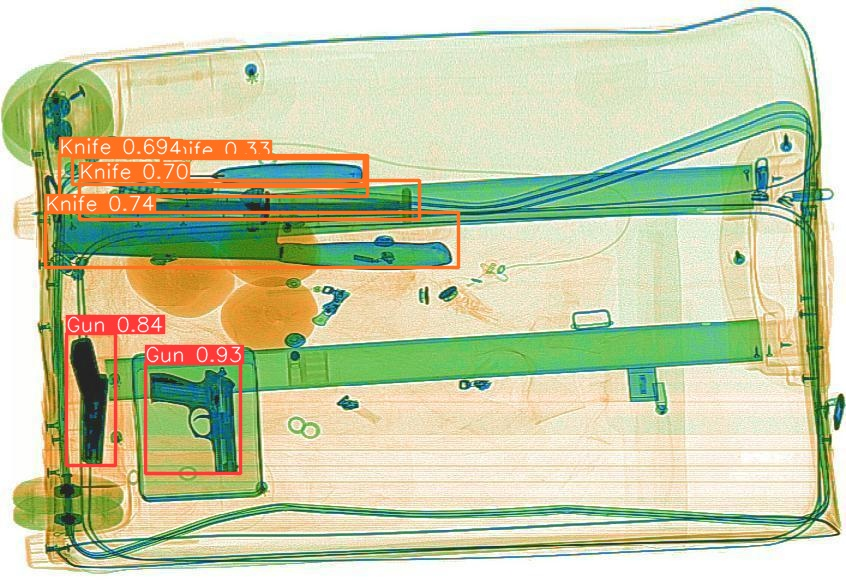

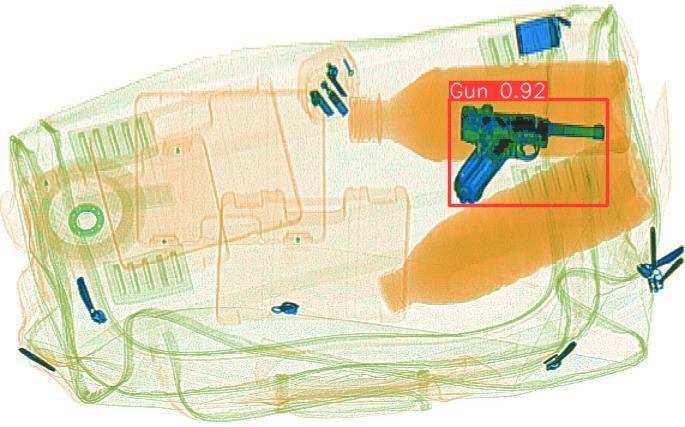

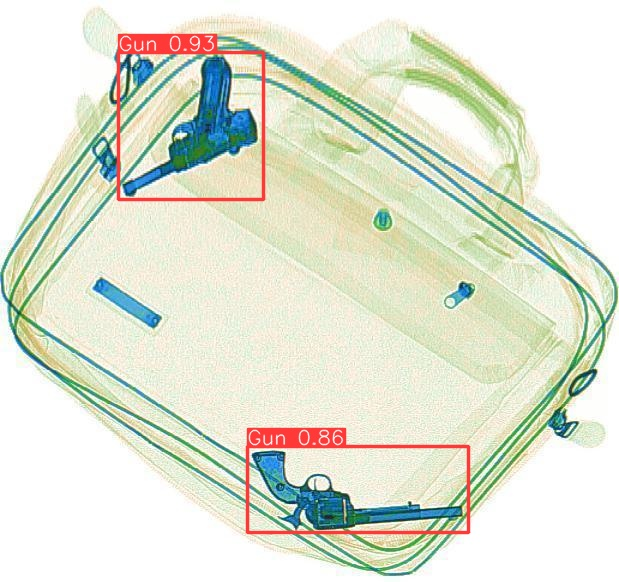

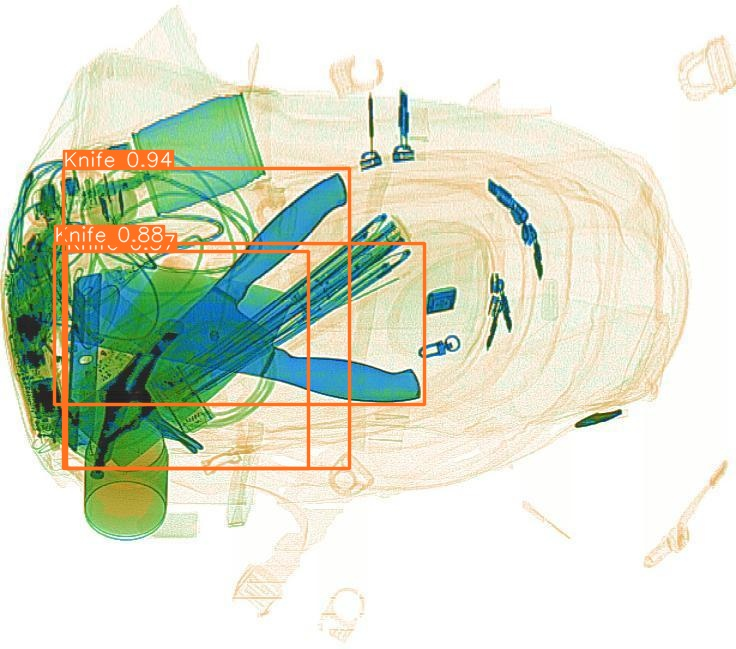

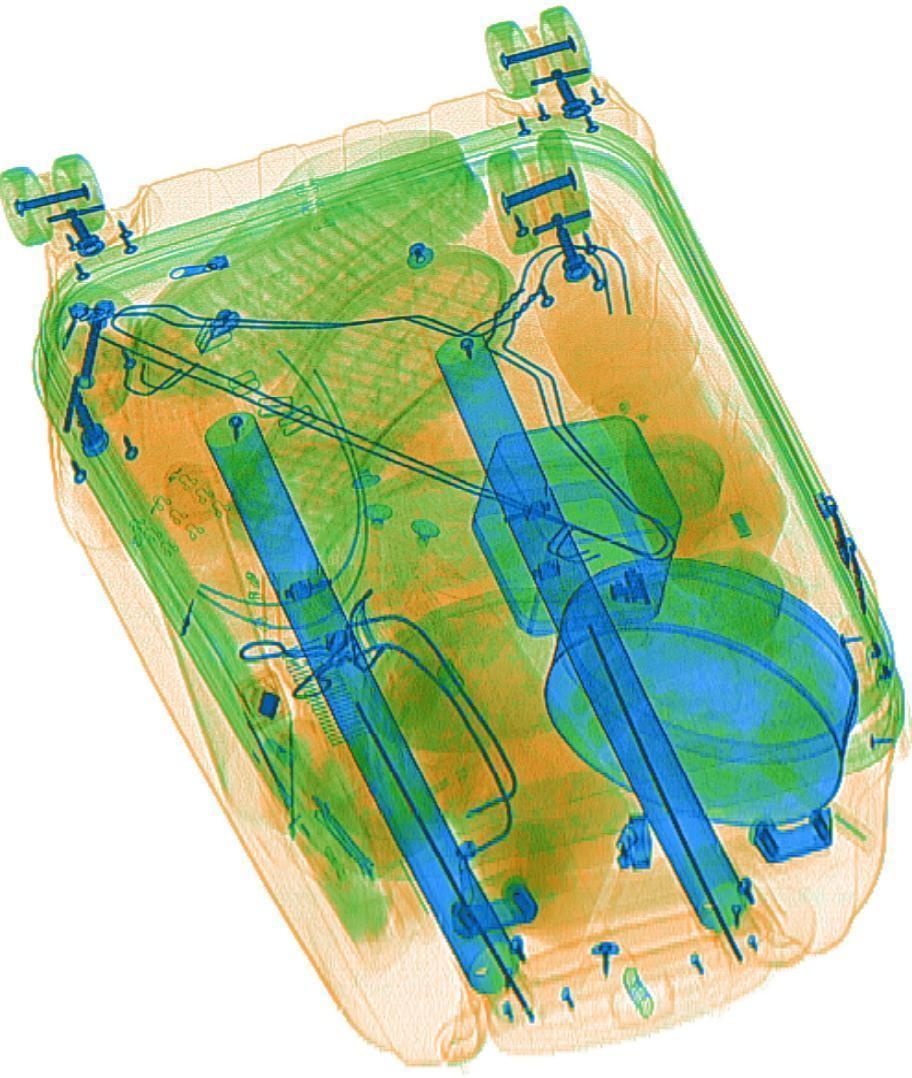

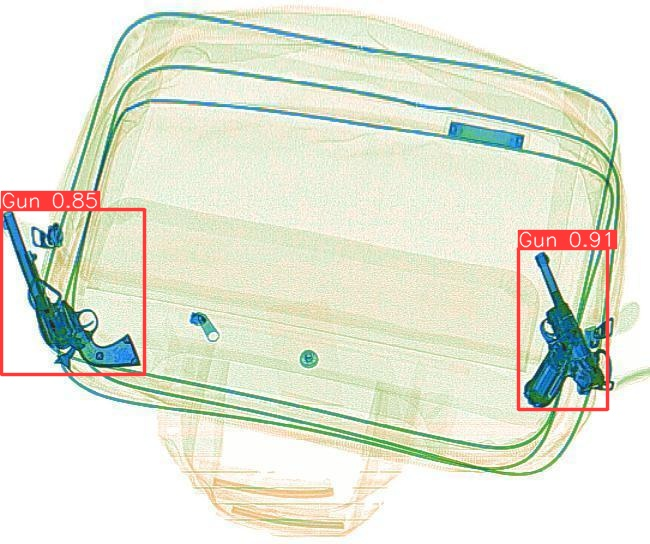

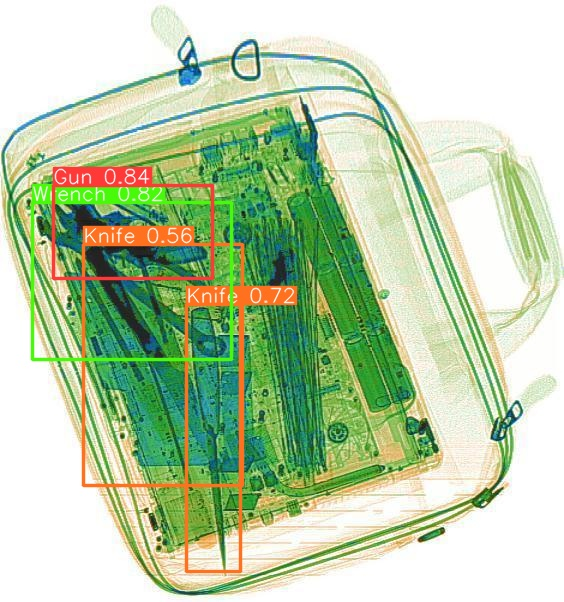

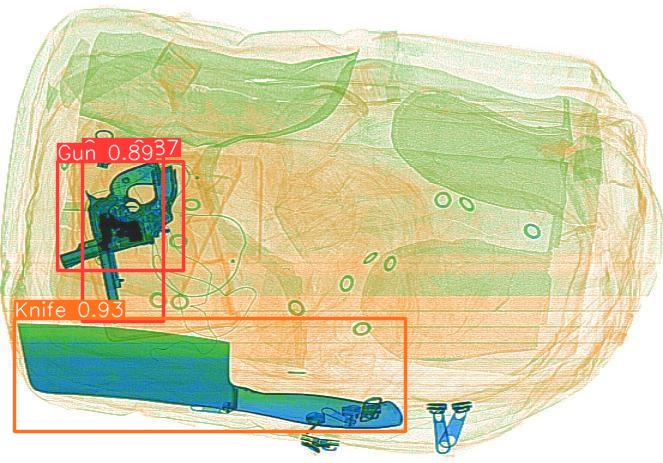

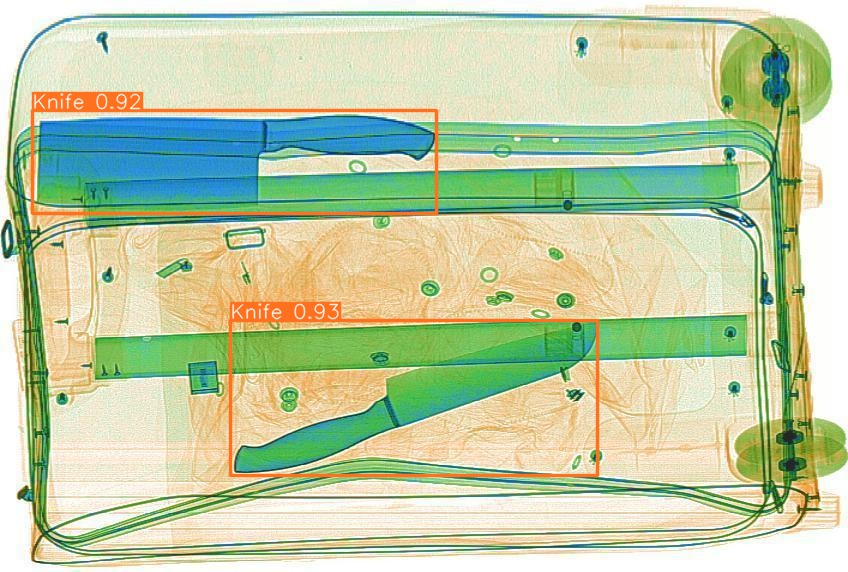

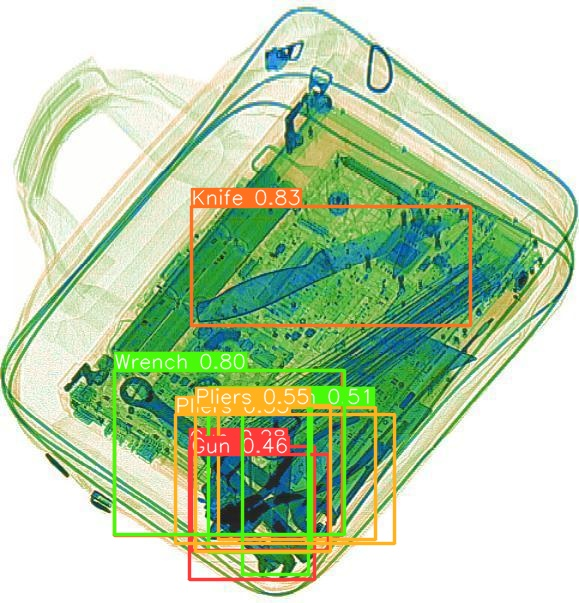

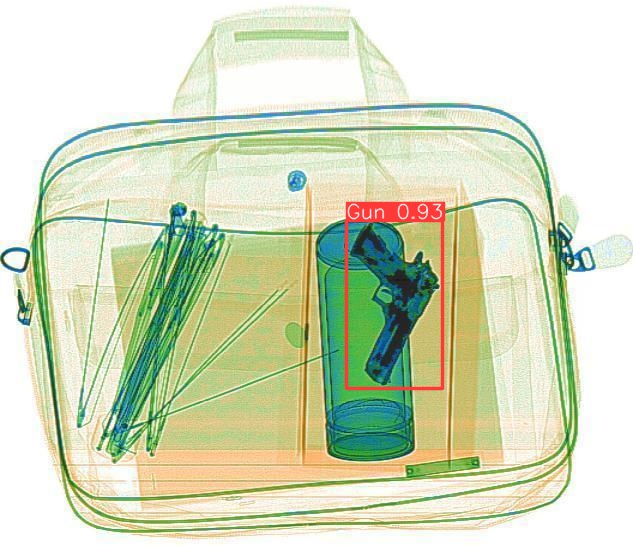

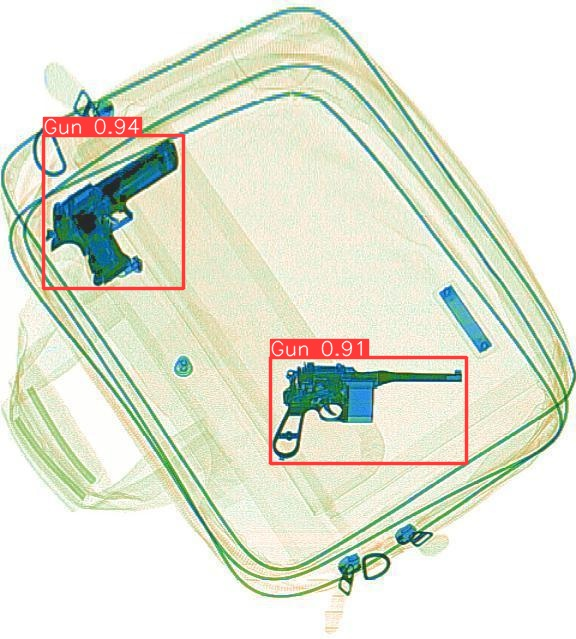

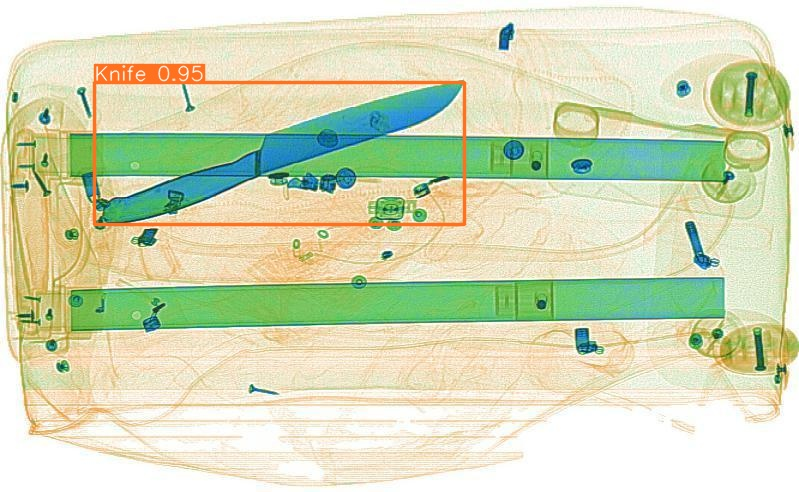

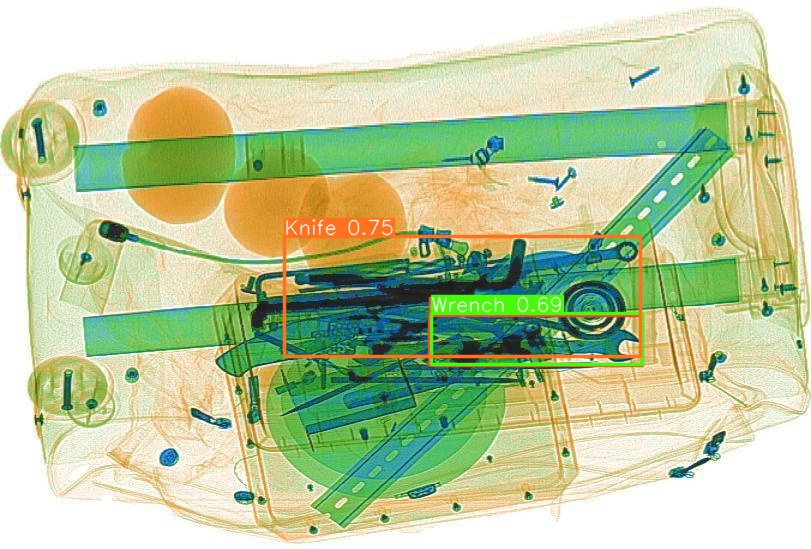

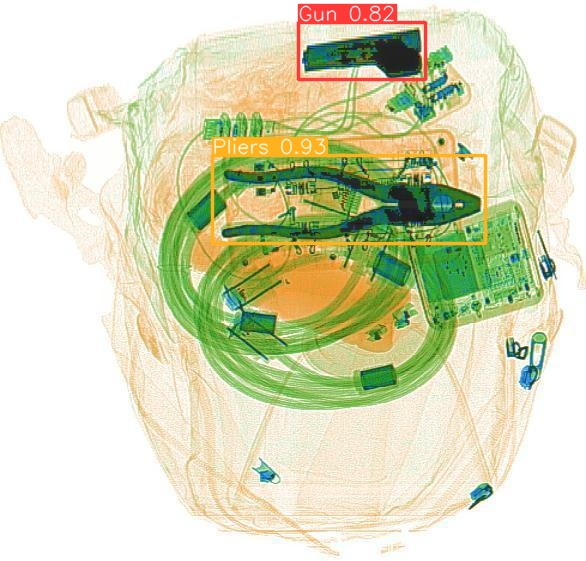

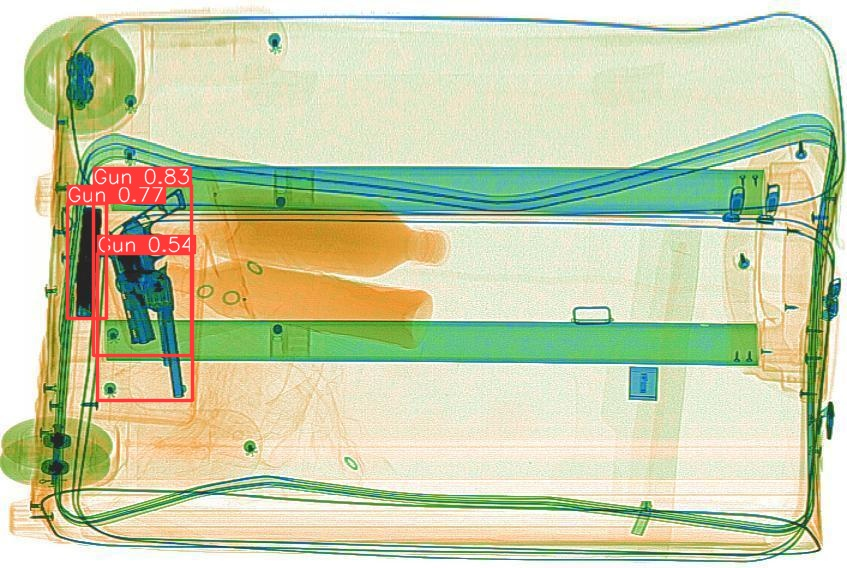

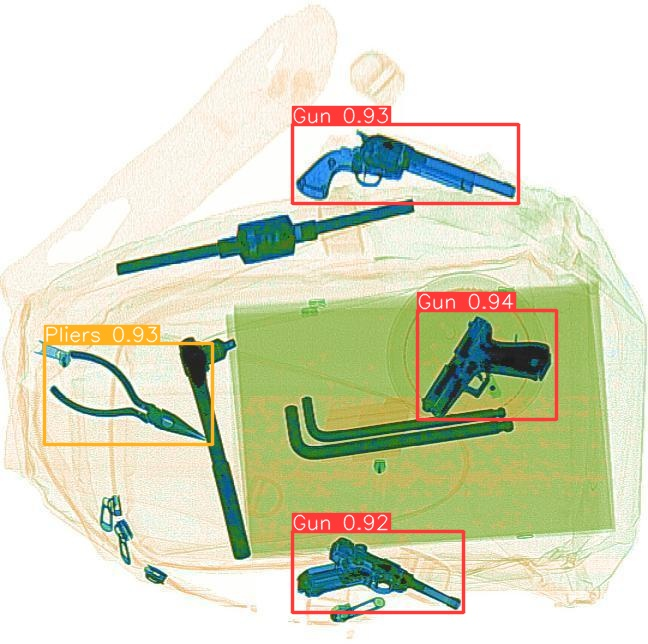

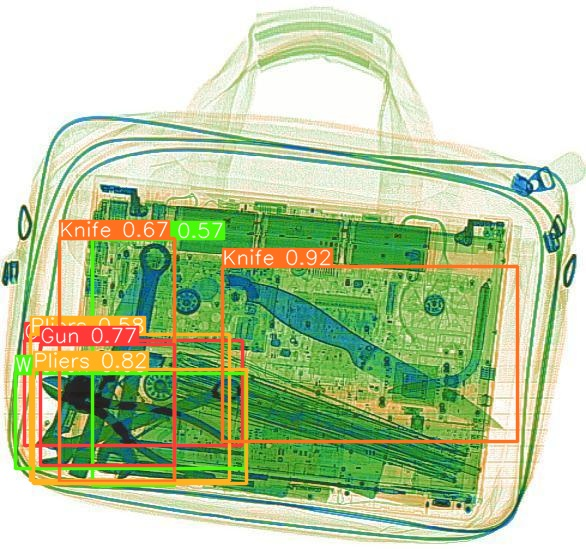

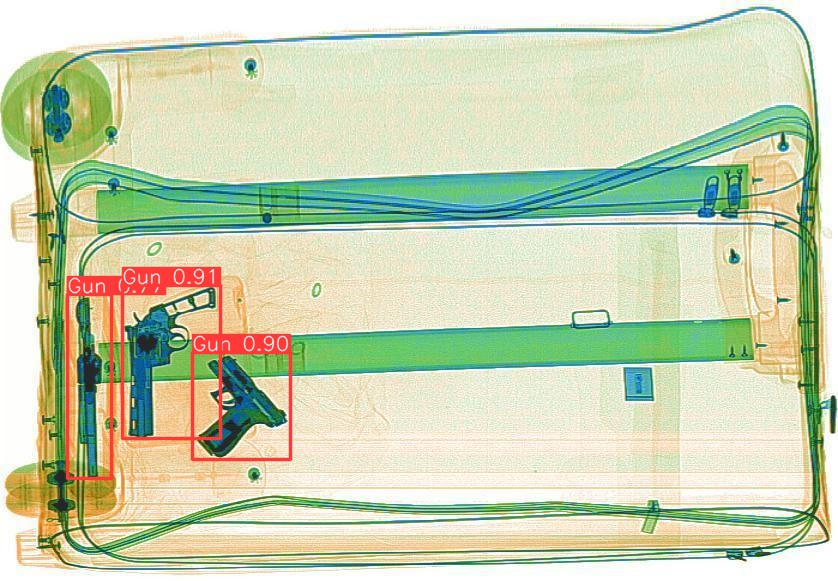

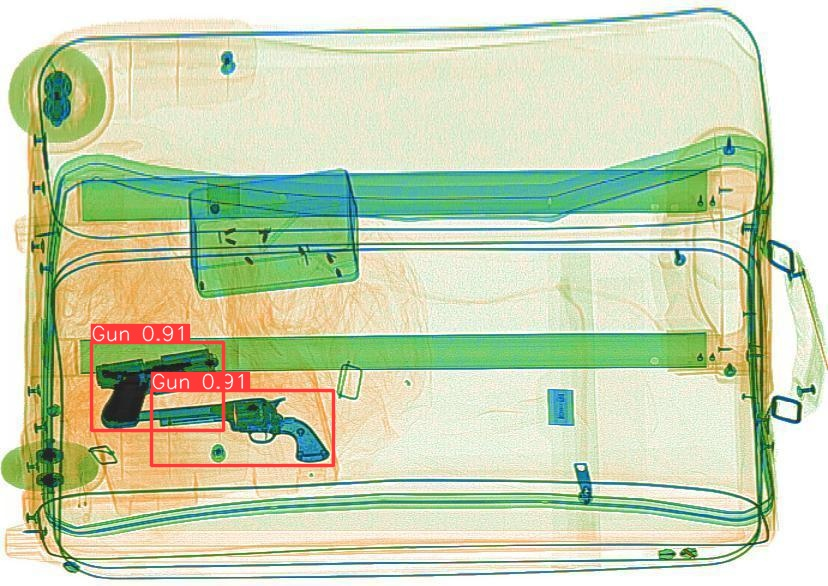

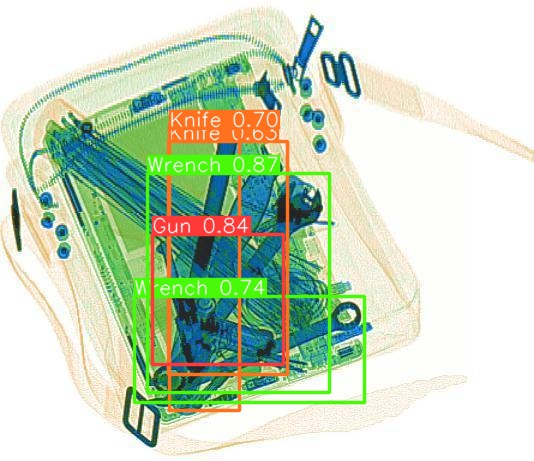

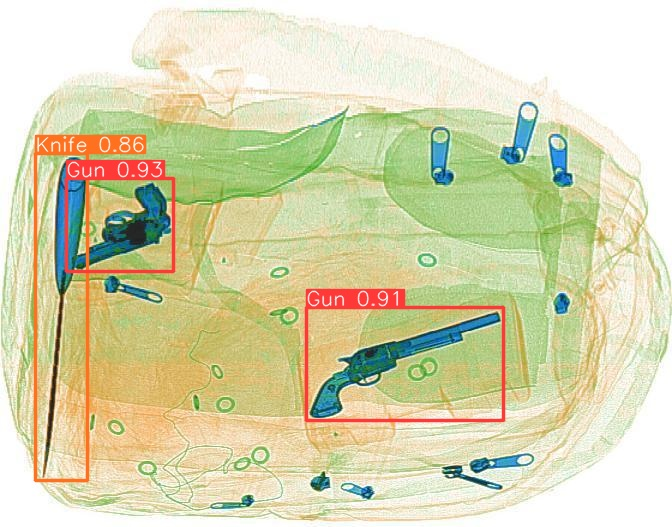

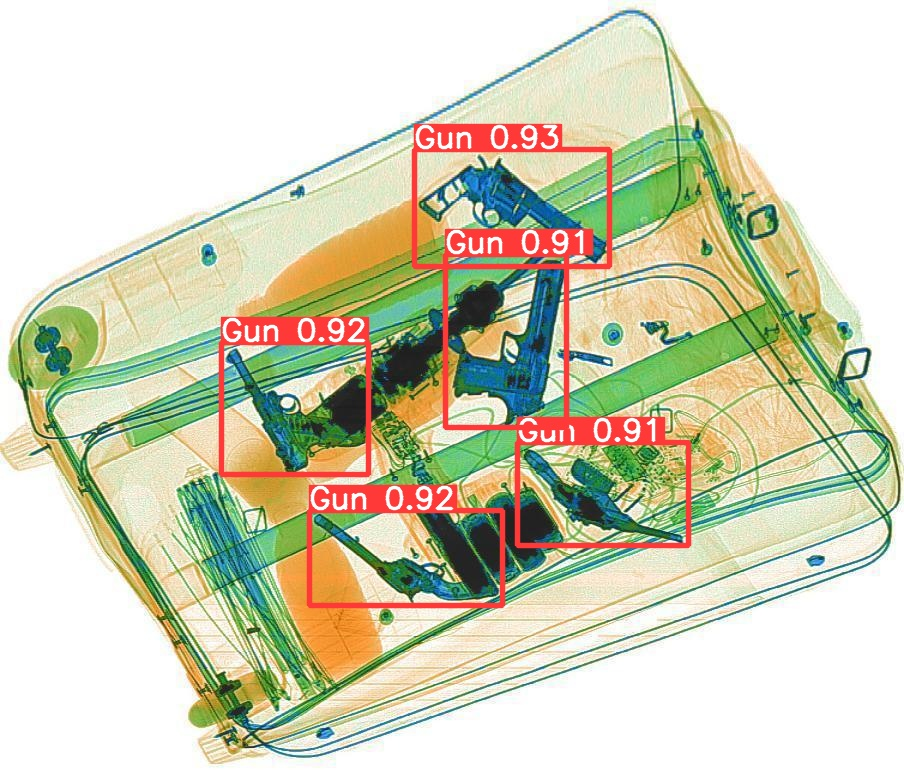

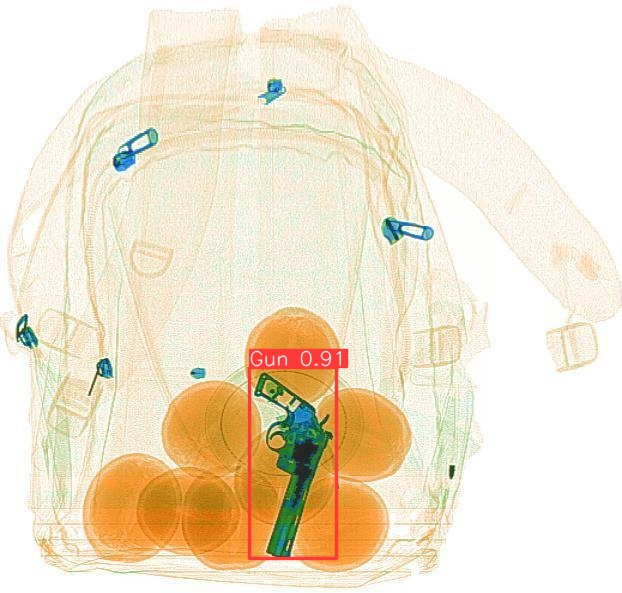

In [9]:
yolo8_model_detection=YOLO('/kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt')
yolo8_model_detection.predict(source='/kaggle/working/weapon_detection-4/test/images', save=True )
from IPython.display import Image, display
import os
res_path='runs/detect/predict'
for image in os.listdir(res_path)[-25:]: # Displaying only 10 results
  # print(os.path.join(res_path,image))
  display(Image(filename=os.path.join(res_path,image), height=300,width=500))

# **MODEL BENCHMARK**

In [ ]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU with training configurations
benchmark(model= yolo8_model_detection, data='/kaggle/working/datasets/sixray100-1/data.yaml', imgsz=640, half=False, device=0)



image 1/1 /opt/conda/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 7 Guns, 1 Wrench, 11.4ms
Speed: 2.6ms preprocess, 11.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)
ERROR ❌️ Benchmark failure for PyTorch: '/kaggle/working/datasets/sixray100-1/data.yaml' does not exist

PyTorch: starting from '/kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (21.5 MB)

TorchScript: starting export with torch 2.0.0...
TorchScript: export success ✅ 1.6s, saved as '/kaggle/working/YOLO_weights/SIXray_Output/weights/best.torchscript' (42.9 MB)

Export complete (1.6s)
Results saved to /kaggle/working/YOLO_weights/SIXray_Output/weights
Predict:         yolo predict task=detect model=/kaggle/working/YOLO_weights/SIXray_Output/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/YOLO_weights/SIXray_Output/weights/best.torchscript imgsz=640 da

In [2]:
!zip -r detect.zip /kaggle/working/YOLO_weights

  adding: kaggle/working/YOLO_weights/ (stored 0%)
  adding: kaggle/working/YOLO_weights/SIXray_Output/ (stored 0%)
  adding: kaggle/working/YOLO_weights/SIXray_Output/train_batch3962.jpg (deflated 8%)
  adding: kaggle/working/YOLO_weights/SIXray_Output/F1_curve.png (deflated 7%)
  adding: kaggle/working/YOLO_weights/SIXray_Output/train_batch2.jpg (deflated 4%)
  adding: kaggle/working/YOLO_weights/SIXray_Output/train_batch3960.jpg (deflated 11%)
  adding: kaggle/working/YOLO_weights/SIXray_Output/confusion_matrix_normalized.png (deflated 25%)
  adding: kaggle/working/YOLO_weights/SIXray_Output/labels_correlogram.jpg (deflated 34%)
  adding: kaggle/working/YOLO_weights/SIXray_Output/PR_curve.png (deflated 16%)
  adding: kaggle/working/YOLO_weights/SIXray_Output/results.png (deflated 8%)
  adding: kaggle/working/YOLO_weights/SIXray_Output/args.yaml (deflated 50%)
  adding: kaggle/working/YOLO_weights/SIXray_Output/train_batch3961.jpg (deflated 9%)
  adding: kaggle/working/YOLO_weights/S